<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


/tmp/ipykernel_2968/700379694.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


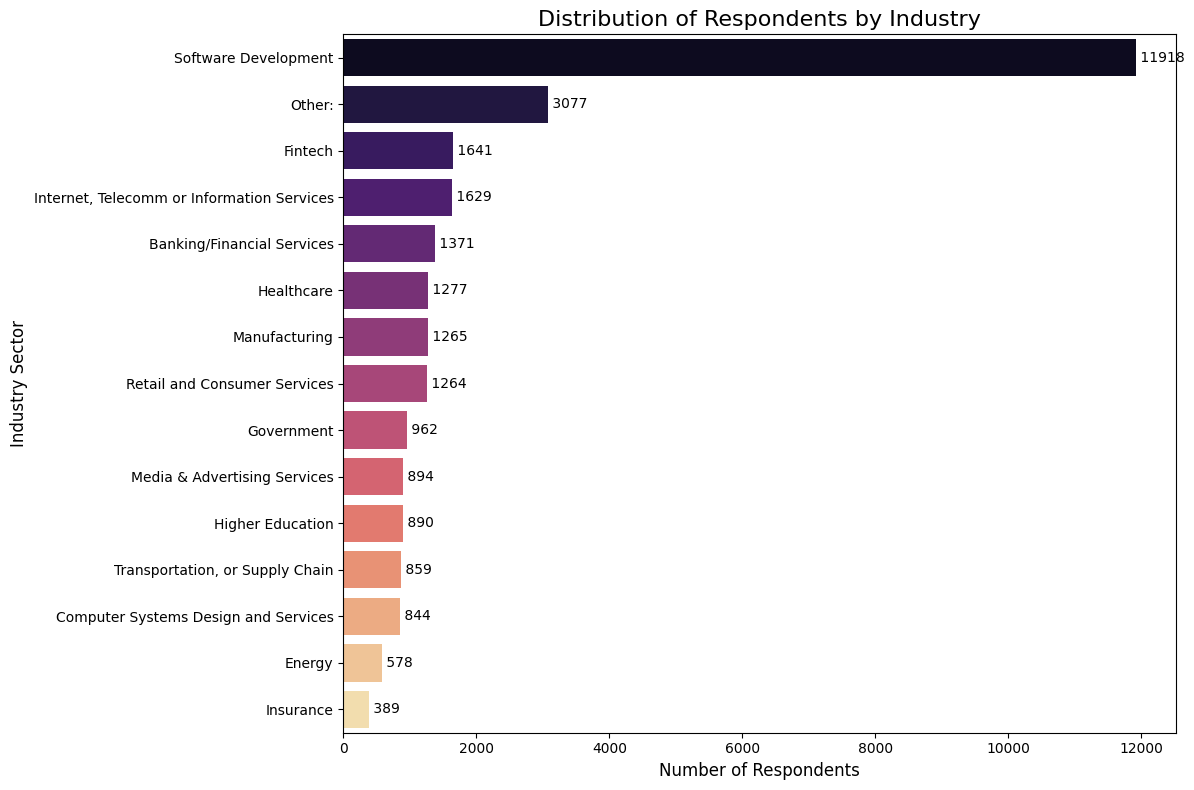

In [3]:
##Write your code here
# Calculate the frequency of each industry
industry_distribution = df['Industry'].value_counts().reset_index()
industry_distribution.columns = ['Industry', 'Respondent Count']

# Create the Visualization
plt.figure(figsize=(12, 8))

# Using a horizontal bar plot (y='Industry') for better readability of labels
sns.barplot(
    data=industry_distribution, 
    x='Respondent Count', 
    y='Industry', 
    palette='magma'
)

# Add Titles and Labels
plt.title('Distribution of Respondents by Industry', fontsize=16)
plt.xlabel('Number of Respondents', fontsize=12)
plt.ylabel('Industry Sector', fontsize=12)

# Optional: Add data labels to the end of each bar
for index, value in enumerate(industry_distribution['Respondent Count']):
    plt.text(value, index, f' {value}', va='center')

plt.tight_layout()
plt.show()

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [4]:
##Write your code here
# Basic Statistics for Yearly Compensation
comp_data = df['ConvertedCompYearly'].dropna()

comp_mean = comp_data.mean()
comp_median = comp_data.median()
comp_std = comp_data.std()

print(f"--- Compensation Statistics ---")
print(f"Mean Compensation:   ${comp_mean:,.2f}")
print(f"Median Compensation: ${comp_median:,.2f}")
print(f"Standard Deviation:  ${comp_std:,.2f}")

# Define the Outlier Threshold
threshold = comp_mean + (3 * comp_std)
print(f"\n--- Outlier Detection ---")
print(f"Defined Threshold (3 Std Dev): ${threshold:,.2f}")

# Identify Values Exceeding the Threshold
outliers = df[df['ConvertedCompYearly'] > threshold]
num_outliers = len(outliers)

print(f"Number of outliers identified: {num_outliers}")

# Display the top 5 highest earners in the outlier group
if num_outliers > 0:
    print("\nTop 5 Compensation Values Exceeding Threshold:")
    print(outliers[['Country', 'DevType', 'ConvertedCompYearly']].sort_values(by='ConvertedCompYearly', ascending=False).head())

--- Compensation Statistics ---
Mean Compensation:   $86,155.29
Median Compensation: $65,000.00
Standard Deviation:  $186,756.97

--- Outlier Detection ---
Defined Threshold (3 Std Dev): $646,426.21
Number of outliers identified: 89

Top 5 Compensation Values Exceeding Threshold:
            Country                               DevType  ConvertedCompYearly
15837      Ethiopia                       Project manager           16256603.0
12723  South Africa  Senior Executive (C-Suite, VP, etc.)           13818022.0
28379        Taiwan                     Hardware Engineer            9000000.0
17593        Brazil                   Developer, back-end            6340564.0
17672       Ukraine                     Developer, mobile            4936778.0


<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


Q1 (25th Percentile): $32,712.00
Q3 (75th Percentile): $107,971.50
Interquartile Range (IQR): $75,259.50
Lower Bound for Outliers: $-80,177.25
Upper Bound for Outliers: $220,860.75
Total Number of Outliers: 978


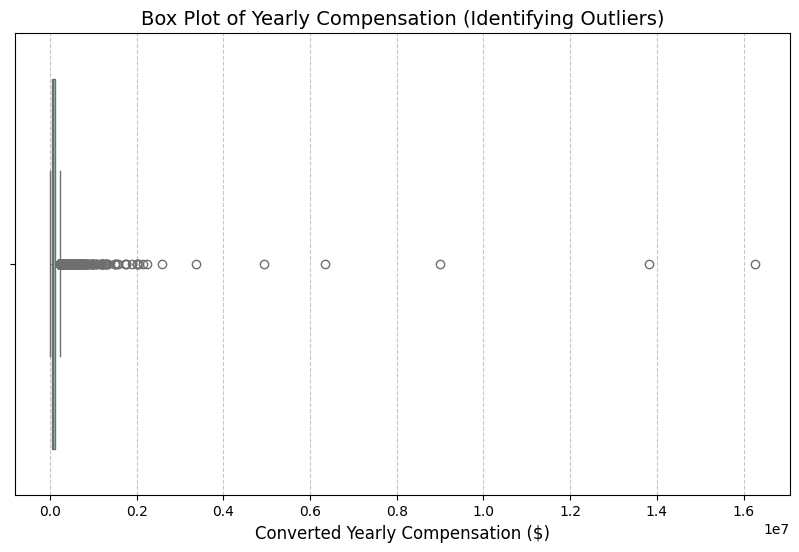

In [5]:
##Write your code here
# Calculate Q1, Q3, and IQR
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3 - Q1

# Determine Bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify and Count Outliers
outliers = df[(df['ConvertedCompYearly'] < lower_bound) | (df['ConvertedCompYearly'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f"Q1 (25th Percentile): ${Q1:,.2f}")
print(f"Q3 (75th Percentile): ${Q3:,.2f}")
print(f"Interquartile Range (IQR): ${IQR:,.2f}")
print(f"Lower Bound for Outliers: ${lower_bound:,.2f}")
print(f"Upper Bound for Outliers: ${upper_bound:,.2f}")
print(f"Total Number of Outliers: {num_outliers}")

# Visualize with a Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['ConvertedCompYearly'], color='skyblue')
plt.title('Box Plot of Yearly Compensation (Identifying Outliers)', fontsize=14)
plt.xlabel('Converted Yearly Compensation ($)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.savefig('compensation_boxplot.png')

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [6]:
##Write your code here
# Create the new DataFrame by filtering out outliers
df_no_outliers = df[(df['ConvertedCompYearly'] >= lower_bound) & 
                    (df['ConvertedCompYearly'] <= upper_bound)]

# Validate the size of the new DataFrame
original_size = df.shape[0]
new_size = df_no_outliers.shape[0]
rows_removed = original_size - new_size

print(f"Original DataFrame size: {original_size} rows")
print(f"New DataFrame size:      {new_size} rows")
print(f"Total outliers removed:  {rows_removed} rows")

# Save the modified dataset
df_no_outliers.to_csv('survey_data_no_outliers.csv', index=False)
print("\nModified dataset saved as 'survey_data_no_outliers.csv'")

Original DataFrame size: 65437 rows
New DataFrame size:      22457 rows
Total outliers removed:  42980 rows

Modified dataset saved as 'survey_data_no_outliers.csv'


<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


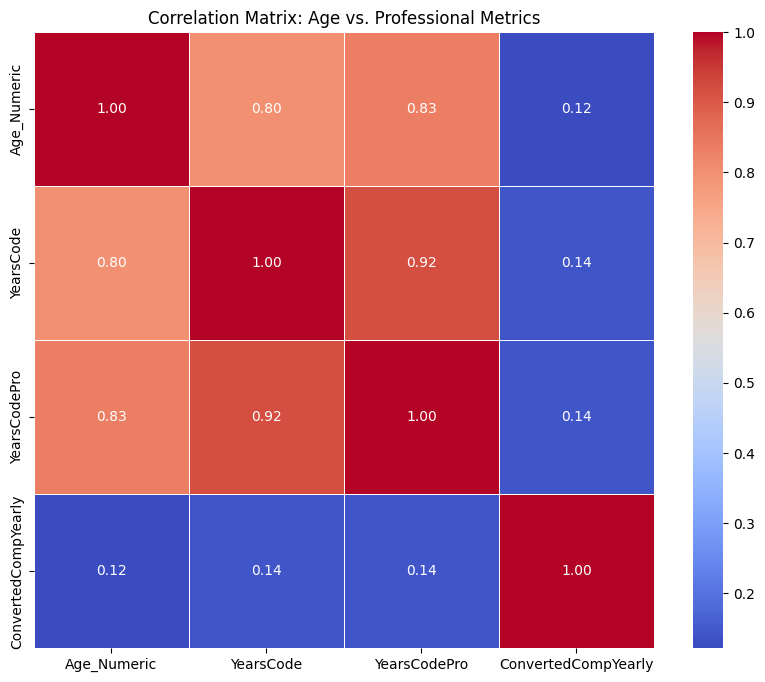

In [8]:
##Write your code here
# Map Age to approximate numeric values
age_mapping = {
    'Under 18 years old': 15,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

# Clean and convert other numeric columns
def clean_exp(val):
    if pd.isna(val): return np.nan
    if 'Less than 1 year' in str(val): return 0.5
    if 'More than 50 years' in str(val): return 55
    try: return float(val)
    except: return np.nan

for col in ['YearsCode', 'YearsCodePro', 'ConvertedCompYearly']:
    if col in df.columns:
        df[col] = df[col].apply(clean_exp)

# Compute the Correlation Matrix
numeric_df = df[['Age_Numeric', 'YearsCode', 'YearsCodePro', 'ConvertedCompYearly']]
corr_matrix = numeric_df.corr()

# Visualize with a Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Age vs. Professional Metrics')
plt.savefig('age_correlation_heatmap.png')

# Save the transformed data for further use
df.to_csv('transformed_survey_data.csv', index=False)

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
